In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import pickle

warnings.filterwarnings("ignore")

In [104]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', sep=",", names = ['Class_Name','handicapped_infacts','water_project_cost_sharing','adoption_of_budget_resolution','physician_fee_freeze','el_salvador_aid','religious_groups_in_schools','anti_satellite_test_ban','aid_to_nicaraguan_contras','mx_missile','immigration','synfuels_corporation_cutback','education_spending','superfund_right_to_sue','crime','duty_free_exports','export_administration_act_south_africa'])
df.head()

,Class_Name,handicapped_infacts,water_project_cost_sharing,adoption_of_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [105]:
df.dtypes

Class_Name                                object
handicapped_infacts                       object
water_project_cost_sharing                object
adoption_of_budget_resolution             object
physician_fee_freeze                      object
el_salvador_aid                           object
religious_groups_in_schools               object
anti_satellite_test_ban                   object
aid_to_nicaraguan_contras                 object
mx_missile                                object
immigration                               object
synfuels_corporation_cutback              object
education_spending                        object
superfund_right_to_sue                    object
crime                                     object
duty_free_exports                         object
export_administration_act_south_africa    object
dtype: object

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Class_Name                              435 non-null    object
 1   handicapped_infacts                     435 non-null    object
 2   water_project_cost_sharing              435 non-null    object
 3   adoption_of_budget_resolution           435 non-null    object
 4   physician_fee_freeze                    435 non-null    object
 5   el_salvador_aid                         435 non-null    object
 6   religious_groups_in_schools             435 non-null    object
 7   anti_satellite_test_ban                 435 non-null    object
 8   aid_to_nicaraguan_contras               435 non-null    object
 9   mx_missile                              435 non-null    object
 10  immigration                             435 non-null    object
 11  synfue

In [107]:
df.describe()

,Class_Name,handicapped_infacts,water_project_cost_sharing,adoption_of_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [108]:
df.isna().sum()

Class_Name                                0
handicapped_infacts                       0
water_project_cost_sharing                0
adoption_of_budget_resolution             0
physician_fee_freeze                      0
el_salvador_aid                           0
religious_groups_in_schools               0
anti_satellite_test_ban                   0
aid_to_nicaraguan_contras                 0
mx_missile                                0
immigration                               0
synfuels_corporation_cutback              0
education_spending                        0
superfund_right_to_sue                    0
crime                                     0
duty_free_exports                         0
export_administration_act_south_africa    0
dtype: int64

In [109]:
df = pd.DataFrame(df, columns =['Class_Name','handicapped_infacts','water_project_cost_sharing','adoption_of_budget_resolution','physician_fee_freeze','el_salvador_aid','religious_groups_in_schools','anti_satellite_test_ban','aid_to_nicaraguan_contras','mx_missile','immigration','synfuels_corporation_cutback','education_spending','superfund_right_to_sue','crime','duty_free_exports','export_administration_act_south_africa']) 


df = df.replace('?', 'N_a')
print(); print(df)


     Class_Name handicapped_infacts water_project_cost_sharing  \
0    republican                   n                          y   
1    republican                   n                          y   
2      democrat                 N_a                          y   
3      democrat                   n                          y   
4      democrat                   y                          y   
..          ...                 ...                        ...   
430  republican                   n                          n   
431    democrat                   n                          n   
432  republican                   n                        N_a   
433  republican                   n                          n   
434  republican                   n                          y   

    adoption_of_budget_resolution physician_fee_freeze el_salvador_aid  \
0                               n                    y               y   
1                               n                    y    

In [110]:
#Defining target variable
df.Class_Name.value_counts()

democrat      267
republican    168
Name: Class_Name, dtype: int64

In [111]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

df.dtypes

Class_Name                                category
handicapped_infacts                       category
water_project_cost_sharing                category
adoption_of_budget_resolution             category
physician_fee_freeze                      category
el_salvador_aid                           category
religious_groups_in_schools               category
anti_satellite_test_ban                   category
aid_to_nicaraguan_contras                 category
mx_missile                                category
immigration                               category
synfuels_corporation_cutback              category
education_spending                        category
superfund_right_to_sue                    category
crime                                     category
duty_free_exports                         category
export_administration_act_south_africa    category
dtype: object

In [112]:
x = df.drop('Class_Name', axis=1)
x.head(2)

,handicapped_infacts,water_project_cost_sharing,adoption_of_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,n,y,n,y,y,y,n,n,n,y,N_a,y,y,y,n,y
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,N_a


In [113]:
y = df['Class_Name']
y.head(2)

0    republican
1    republican
Name: Class_Name, dtype: category
Categories (2, object): ['democrat', 'republican']

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (304, 16) (304,)
Test (131, 16) (131,)


In [115]:
def prepare_inputs(x_train, x_test):
    oe = OrdinalEncoder()
    oe.fit(x_train)
    x_train_enc = oe.fit_transform(x_train)
    x_test_enc = oe.fit_transform(x_test)
    return x_train_enc, x_test_enc

In [116]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.fit_transform(y_test)
    return y_train_enc, y_test_enc

In [117]:
x_train_enc, x_test_enc = prepare_inputs(x_train, x_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [118]:
x_train_ss = pd.DataFrame(StandardScaler().fit_transform(x_train_enc), columns=x_train.columns)
x_train_ss.head()

,handicapped_infacts,water_project_cost_sharing,adoption_of_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,-0.687173,-0.464977,-0.935255,1.072664,0.968663,0.768034,-0.933078,-0.915946,-0.802163,-0.932581,-0.526785,1.082989,0.942874,0.807607,-0.563510,-0.425447
1,-0.687173,1.022950,-0.935255,1.072664,0.968663,0.768034,-0.933078,-0.915946,-0.802163,-0.932581,1.335339,1.082989,0.942874,0.807607,-0.563510,-0.425447
2,1.113694,-0.464977,-0.935255,1.072664,0.968663,0.768034,-0.933078,-0.915946,-0.802163,0.970134,-0.526785,1.082989,0.942874,0.807607,-0.563510,-0.425447
3,-0.687173,1.022950,-0.935255,1.072664,0.968663,0.768034,0.885228,0.846380,-0.802163,-0.932581,1.335339,1.082989,0.942874,0.807607,1.115971,0.761121
4,-0.687173,-1.952905,0.864223,-0.749067,-0.816025,-1.070410,0.885228,0.846380,0.964921,0.970134,1.335339,-0.622859,-0.743207,0.807607,1.115971,0.761121


In [119]:
x_train_rs = pd.DataFrame(RobustScaler().fit_transform(x_train_enc), columns=x_train.columns)
x_train_rs.head()

,handicapped_infacts,water_project_cost_sharing,adoption_of_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0.0,0.0,-1.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,1.0,1.0,0.0,0.0,-1.0
1,0.0,1.0,-1.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,1.0,1.0,1.0,0.0,0.0,-1.0
2,1.0,0.0,-1.0,1.0,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0
3,0.0,1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [120]:
x_train_mm = pd.DataFrame(MinMaxScaler().fit_transform(x_train_enc), columns=x_train.columns)
x_train_mm.head()

,handicapped_infacts,water_project_cost_sharing,adoption_of_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,0.5,0.5,0.5,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,1.0,1.0,1.0,0.5,0.5
1,0.5,1.0,0.5,1.0,1.0,1.0,0.5,0.5,0.5,0.5,1.0,1.0,1.0,1.0,0.5,0.5
2,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,0.5,1.0,0.5,1.0,1.0,1.0,0.5,0.5
3,0.5,1.0,0.5,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0
4,0.5,0.0,1.0,0.5,0.5,0.5,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0


In [121]:
#Applying robust scaler to x_test set
x_test_rs = pd.DataFrame(RobustScaler().fit_transform(x_test_enc), columns=x_test.columns)
x_test_rs.head()

,handicapped_infacts,water_project_cost_sharing,adoption_of_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,1.0,-2.0
1,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
2,0.0,0.0,-1.0,1.0,1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-1.0,1.0,1.0,0.0,-1.0,-1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,-1.0
4,0.0,0.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0


In [122]:
oversample = SMOTE()

x_train_rs_over, y_train_over = oversample.fit_resample(x_train_rs, y_train_enc)
print(Counter(y_train_over))

Counter({1: 178, 0: 178})


In [123]:
undersample = RandomUnderSampler()

x_train_rs_under, y_train_under = undersample.fit_resample(x_train_rs, y_train_enc)
print(Counter(y_train_under))

Counter({0: 126, 1: 126})


In [124]:
x_test_rs_over, y_test_over = oversample.fit_resample(x_test_rs, y_test_enc)
print(Counter(y_test_over))


Counter({0: 89, 1: 89})


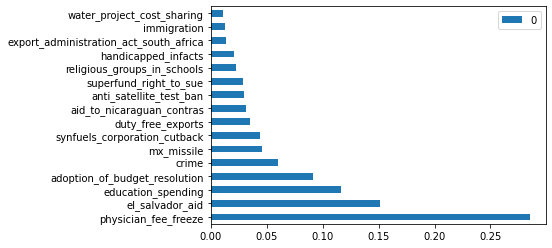

In [125]:
fi = ExtraTreesClassifier()
fi_a = fi.fit(x_train_rs_over, y_train_over)

df_fi_a = pd.DataFrame(fi_a.feature_importances_,index=x_train_rs_over.columns)
df_fi_a.nlargest(16,df_fi_a.columns).plot(kind='barh')
plt.show()

13


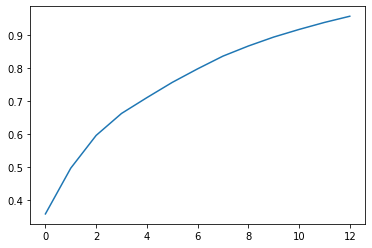

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.520497,0.476592,0.385441,0.050161,-0.253074,0.190825,-0.290009,-0.194964,0.099188,0.152219,0.081258,0.032002,-0.042706
1,-1.504182,0.370056,-0.822023,0.038274,-0.103087,0.719770,-0.319814,0.060064,0.072884,-0.219281,0.101533,0.130291,-0.146251
2,-1.378942,0.199983,0.129708,-0.483736,-0.500927,-0.548543,0.110556,-0.023957,-0.390084,-0.123714,-0.441250,-0.237075,0.197958
3,-0.646132,-0.886230,-0.757771,-0.394353,-0.289885,0.952458,-0.256253,-0.472033,0.464706,0.044076,0.277182,0.553140,-0.560836
4,1.555463,-0.863596,1.070222,-0.619424,0.017788,0.724101,0.176196,0.317553,-0.523658,-0.268740,0.378147,0.406886,0.241223


In [126]:
from sklearn.decomposition import PCA

pca = PCA(.95)

pca_train = pca.fit(x_train_rs_over, y_train_over)
print(pca_train.n_components_)

plt.plot(np.cumsum(pca_train.explained_variance_ratio_))
plt.show()

x_train_rs_over_pca = pd.DataFrame(pca_train.transform(x_train_rs_over))
x_train_rs_over_pca.head()


In [127]:
pca_test = pca.fit(x_test_rs_over, y_test_over)
print(pca_test.n_components_)

x_test_rs_over_pca = pd.DataFrame(pca_test.transform(x_test_rs_over))
x_test_rs_over_pca.head()

13


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.816770,0.658773,0.423623,-1.491488,-0.599793,-0.061071,0.215464,-0.199768,0.370583,-0.687002,0.039094,-0.274894,-0.260892
1,1.788765,-0.646192,-0.229121,0.517042,-0.486869,-0.704284,0.066278,-0.231623,-0.067837,-0.517568,-0.035817,-0.054212,-0.019816
2,-1.154753,-0.401461,0.801421,-0.071218,0.377075,0.399103,0.516940,0.004256,0.496173,-0.121186,0.174588,-0.237178,0.149712
3,-1.316850,0.556178,-0.075604,-0.716832,0.489789,-0.409404,-0.189223,-0.143889,0.043798,0.504626,0.136105,-0.315209,0.051709
4,-0.860102,0.764734,0.953667,-0.078277,0.066248,-0.381231,0.407677,-0.420474,0.116646,-0.089272,0.340241,-0.484369,-0.080512


In [128]:
#6. Apply algorithm 
# Models to be tested: Logistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [129]:

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_train_rs_over_pca, y_train_over)
    train_score = round(classifier.score(x_train_rs_over_pca, y_train_over),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(x_test_rs_over_pca, y_test_over),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.97, 0.93, 0.98, 1.0, 1.0]
[0.83, 0.9, 0.84, 0.88, 0.87]


In [130]:
train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_train_rs_over_pca, y_train_over)
    train_score = cross_val_score(classifier, x_train_rs_over_pca, y_train_over, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, x_test_rs_over_pca, y_test_over, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)
print(test_cross_scores)

[0.95, 0.92, 0.95, 0.89, 0.94]
[0.96, 0.92, 0.96, 0.88, 0.96]


In [131]:
rf = RandomForestClassifier()
rf.fit(x_train_rs_over_pca, y_train_over)
rf_pred = cross_val_predict(rf, x_test_rs_over_pca, y_test_over, cv=5)
print(roc_auc_score(y_test_over, rf_pred))

0.9606741573033709


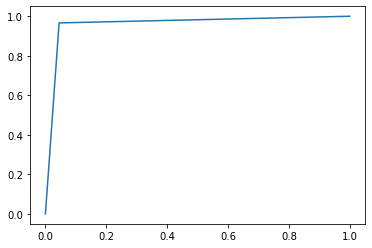

In [132]:
fpr, tpr, _ = roc_curve(y_test_over, rf_pred)
plt.plot(fpr, tpr)
plt.show()

In [133]:
from sklearn.model_selection import GridSearchCV

#Logistic Regression
lr = LogisticRegression()
lr_params = {"penalty": ['l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_logistic = GridSearchCV(lr, lr_params)
grid_logistic.fit(x_train_rs_over_pca, y_train_over)
lr_best = grid_logistic.best_estimator_
lr_best

LogisticRegression(C=100, solver='saga')

In [134]:
categorical_columns = df.select_dtypes(exclude = 'number').drop('Class_Name', axis = 1).columns
df.info()
categorical_columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Class_Name                              435 non-null    category
 1   handicapped_infacts                     435 non-null    category
 2   water_project_cost_sharing              435 non-null    category
 3   adoption_of_budget_resolution           435 non-null    category
 4   physician_fee_freeze                    435 non-null    category
 5   el_salvador_aid                         435 non-null    category
 6   religious_groups_in_schools             435 non-null    category
 7   anti_satellite_test_ban                 435 non-null    category
 8   aid_to_nicaraguan_contras               435 non-null    category
 9   mx_missile                              435 non-null    category
 10  immigration                             435 non-nu

Index(['handicapped_infacts', 'water_project_cost_sharing',
       'adoption_of_budget_resolution', 'physician_fee_freeze',
       'el_salvador_aid', 'religious_groups_in_schools',
       'anti_satellite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missile',
       'immigration', 'synfuels_corporation_cutback', 'education_spending',
       'superfund_right_to_sue', 'crime', 'duty_free_exports',
       'export_administration_act_south_africa'],
      dtype='object')

In [135]:
from scipy.stats import chi2_contingency

In [136]:
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(df['Class_Name'], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                                    Column                      Hypothesis
0                      handicapped_infacts          Reject Null Hypothesis
1               water_project_cost_sharing  Fail to Reject Null Hypothesis
2            adoption_of_budget_resolution          Reject Null Hypothesis
3                     physician_fee_freeze          Reject Null Hypothesis
4                          el_salvador_aid          Reject Null Hypothesis
5              religious_groups_in_schools          Reject Null Hypothesis
6                  anti_satellite_test_ban          Reject Null Hypothesis
7                aid_to_nicaraguan_contras          Reject Null Hypothesis
8                               mx_missile          Reject Null Hypothesis
9                              immigration  Fail to Reject Null Hypothesis
10            synfuels_corporation_cutback          Reject Null Hypothesis
11                      education_spending          Reject Null Hypothesis
12                  super

In [137]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train_rs_over_pca, y_train_over)
xgb_train_score = cross_val_score(xgb_model, x_train_rs_over_pca, y_train_over, cv=5)
xgb_test_score = cross_val_score(xgb_model, x_test_rs_over_pca, y_test_over, cv=5)

print(round(xgb_train_score.mean(),2))
print(round(xgb_test_score.mean(),2))

[12:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [138]:
clf = RandomForestClassifier()

clf.fit(x_train_enc, y_train_enc)

RandomForestClassifier()

In [139]:
clf.score(x_test_enc, y_test_enc)

0.9618320610687023

In [140]:
clf.predict(x_test_enc)

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1])

In [141]:
clf.predict_proba(x_test_enc[:5])

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.04, 0.96],
       [0.04, 0.96]])

In [142]:
print(f"Congressional Voting Classifier Accuracy: {clf.score(x_test_enc, y_test_enc) * 100:.2f}%")

Congressional Voting Classifier Accuracy: 96.18%


In [143]:

y_probs = clf.predict_proba(x_test_enc)


y_probs = y_probs[:, 1]


fpr, tpr, thresholds = roc_curve(y_test_enc, y_probs)


fpr

array([0.        , 0.        , 0.        , 0.01123596, 0.01123596,
       0.01123596, 0.01123596, 0.01123596, 0.02247191, 0.02247191,
       0.03370787, 0.03370787, 0.04494382, 0.06741573, 0.08988764,
       0.11235955, 0.15730337, 0.16853933, 0.17977528, 0.2247191 ,
       0.24719101, 0.26966292, 0.30337079, 0.35955056, 0.39325843,
       0.56179775, 1.        ])

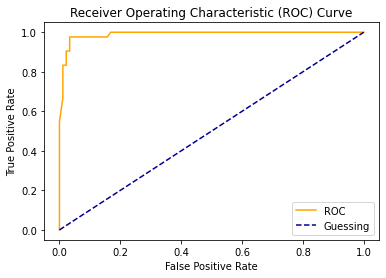

In [144]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
   
    plt.plot(fpr, tpr, color='orange', label='ROC')
   
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
   
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [145]:
roc_auc_score(y_test_enc, y_probs)

0.9895666131621188

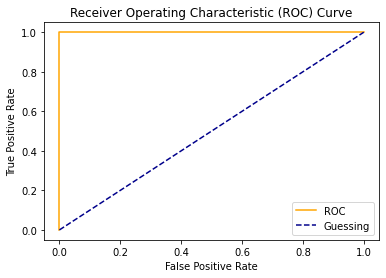

In [146]:
# Plotting perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test_enc, y_test_enc)
plot_roc_curve(fpr, tpr)

In [147]:
# Perfect ROC AUC score
roc_auc_score(y_test_enc, y_test_enc)

1.0

In [148]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_enc, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.93      0.93      0.93        42

    accuracy                           0.95       131
   macro avg       0.95      0.95      0.95       131
weighted avg       0.95      0.95      0.95       131



In [149]:
conf_mat = confusion_matrix(y_test_enc, y_preds)
conf_mat

array([[86,  3],
       [ 3, 39]], dtype=int64)

In [150]:
pd.crosstab(y_test_enc, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,86,3
1,3,39


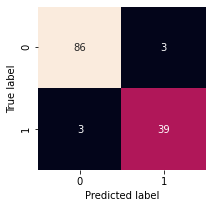

In [151]:
import seaborn as sns 
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

conf_mat=confusion_matrix(y_test_enc, y_preds)

plot_conf_mat(conf_mat)

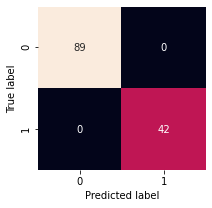

In [152]:
# Perfect confusion matrix
perfect_conf_mat = confusion_matrix(y_test_enc, y_test_enc)
plot_conf_mat(perfect_conf_mat)

In [153]:
# Evaluating the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test_enc, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test_enc, y_preds):.2f}")
print(f"Recall: {recall_score(y_test_enc, y_preds):.2f}")
print(f"F1: {f1_score(y_test_enc, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 95.42%
Precision: 0.93
Recall: 0.93
F1: 0.93


In [154]:
clf = RandomForestClassifier()

In [155]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [156]:
# Hyperparameter tuning uding grid RandomizedSearchCV.
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [157]:
clf = RandomForestClassifier(n_jobs=1)

In [158]:
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, 
                            cv=5, 
                            verbose=2) 


rs_clf.fit(x_train_enc, y_train_enc);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; to

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, mi

In [159]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [160]:
rs_y_preds = rs_clf.predict(x_test_enc)

rs_metrics = evaluate_preds(y_test_enc, rs_y_preds)

Acc: 94.66%
Precision: 0.93
Recall: 0.90
F1 score: 0.92


In [161]:
#Grid 2 is based on the best parameters from Randomized Search tuning
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

In [162]:

clf = RandomForestClassifier(n_jobs=1)


gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=2, 
                      verbose=2) 


gs_clf.fit(x_train_enc, y_train_enc);

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   1.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   2.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_s

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   1.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt,

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1500; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=2000; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   2.3s
[CV] END max_depth=10, max_featu

In [163]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1200}

In [164]:

gs_y_preds = gs_clf.predict(x_test_enc)


gs_metrics = evaluate_preds(y_test_enc, gs_y_preds)

Acc: 95.42%
Precision: 0.93
Recall: 0.93
F1 score: 0.93


In [169]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(x_train_enc, y_train_enc)
    print(f"Model accuracy on test set: {model.score(x_test_enc, y_test_enc) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 95.41984732824427%

Trying model with 20 estimators...
Model accuracy on test set: 93.89312977099237%

Trying model with 30 estimators...
Model accuracy on test set: 95.41984732824427%

Trying model with 40 estimators...
Model accuracy on test set: 95.41984732824427%

Trying model with 50 estimators...
Model accuracy on test set: 96.18320610687023%

Trying model with 60 estimators...
Model accuracy on test set: 95.41984732824427%

Trying model with 70 estimators...
Model accuracy on test set: 94.65648854961832%

Trying model with 80 estimators...
Model accuracy on test set: 93.89312977099237%

Trying model with 90 estimators...
Model accuracy on test set: 95.41984732824427%



In [170]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators=i).fit(x_train_enc, y_train_enc)
    print(f"Model accuracy on test set: {model.score(x_test_enc, y_test_enc) * 100}%")
    print(f"Cross-validation score: {np.mean(cross_val_score(model, x_train_enc, y_train_enc, cv=5)) * 100}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 95.41984732824427%
Cross-validation score: 95.05464480874318%

Trying model with 20 estimators...
Model accuracy on test set: 93.89312977099237%
Cross-validation score: 95.39344262295081%

Trying model with 30 estimators...
Model accuracy on test set: 94.65648854961832%
Cross-validation score: 95.38797814207652%

Trying model with 40 estimators...
Model accuracy on test set: 96.18320610687023%
Cross-validation score: 95.71584699453553%

Trying model with 50 estimators...
Model accuracy on test set: 96.18320610687023%
Cross-validation score: 95.71584699453553%

Trying model with 60 estimators...
Model accuracy on test set: 94.65648854961832%
Cross-validation score: 95.38797814207649%

Trying model with 70 estimators...
Model accuracy on test set: 94.65648854961832%
Cross-validation score: 95.7158469945355%

Trying model with 80 estimators...
Model accuracy on test set: 95.41984732824427%
Cross-validation score: 95.3879781420

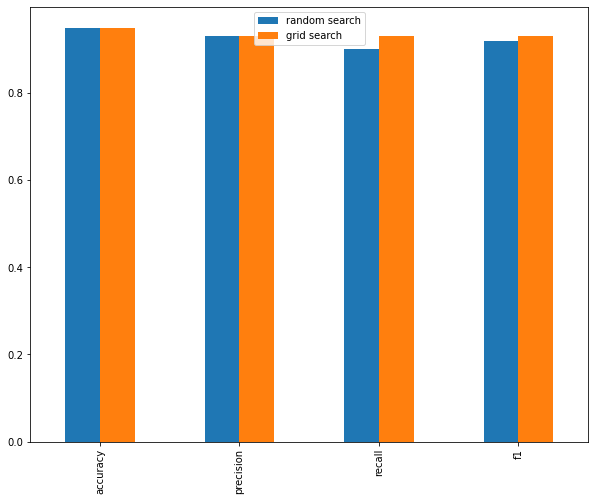

In [165]:
compare_metrics = pd.DataFrame({"random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

In [166]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [167]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [168]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(x_test_enc)
evaluate_preds(y_test_enc, pickle_y_preds)

Acc: 95.42%
Precision: 0.93
Recall: 0.93
F1 score: 0.93


{'accuracy': 0.95, 'precision': 0.93, 'recall': 0.93, 'f1': 0.93}